## Molybdän-Spektrum

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

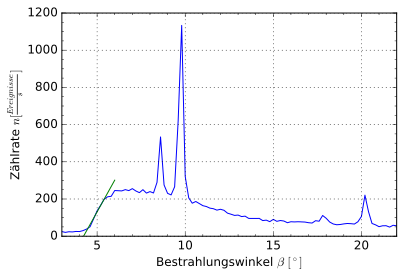

In [12]:
import uncertainties as uc
import uncertainties.unumpy as un
from scipy.optimize import curve_fit
import scipy.constants as c

d = 201.4e-12
U_B = 35e+3

data1a = pd.read_csv("255\\1a_MoSpek_LiF.txt", sep="\t", decimal=',', header=None)
b = data1a[0].values
n = data1a[1].values
# display(data1a)

f_U = lambda b,n: b-b+n
s_U = slice(0,7)
poptU, pcovU = curve_fit(f_U, b[s_U], n[s_U])
n_U = uc.ufloat(poptU[0], sqrt(pcovU[0][0]))

s = ( (n <= 200) & ( (b <= 6) | (n <= 45) ) ) & (n > 30)

f_lin = lambda x, m, n0: m*x+n0

popt, pcov = curve_fit(f_lin, b[s], n[s])
m = uc.ufloat(popt[0], sqrt(pcov[0][0]))
n0 = uc.ufloat(popt[1], sqrt(pcov[1][1]))

b_G = (n_U-n0)/m
y_G = 2*d*un.sin(b_G/360*2*pi)

h = c.e * y_G * U_B / c.c

display(Latex(r"$h = {:L}$".format(h)))
display(Latex(r"$\beta_2  = {:L}$".format(un.arcsin(y_G/d)/2/pi*360)))

x_ = linspace(4,6,100)
figure()
plot(b,n)
plot(x_, f_lin(x_,*popt))
xlim((3,22))
ylim((0,1200))
xlabel(r"Bestrahlungswinkel $\beta \ [^\circ]$")
ylabel(r"Zählrate $n [\frac{Ereignisse}{s}]$")
# yscale('log')
minorticks_on()
grid()
show()

## $K_{\alpha}$ und $K_{\beta}$

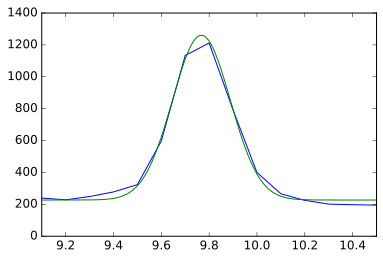

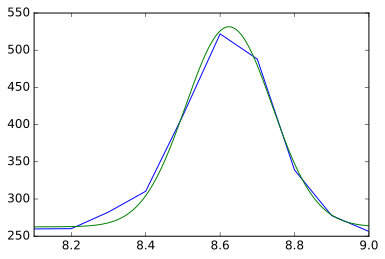

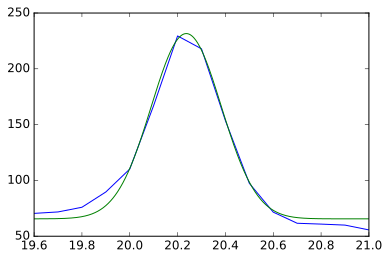

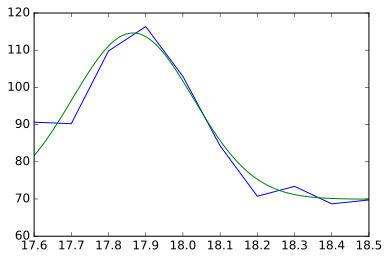

In [43]:
dataK = [
    loadtxt("255\\1b_Ka1_LiF.txt", skiprows=1).transpose(),
    loadtxt("255\\1b_Kb1_LiF.txt", skiprows=1).transpose(),
    loadtxt("255\\1b_Ka2_LiF.txt", skiprows=1).transpose(),
    loadtxt("255\\1b_Kb2_LiF.txt", skiprows=1).transpose()
]
b = array([dataK[0][0], dataK[1][0], dataK[2][0], dataK[3][0]])
n = array([dataK[0][1], dataK[1][1], dataK[2][1], dataK[3][1]])

f_Gauss = lambda x, m, s, A, n0: A/(sqrt(2*pi)*s) * exp(-1/2 * ((x-m)/s)**2) + n0

for i in range(4):
    popt, pcov = curve_fit(f_Gauss, b[i], n[i], p0=[b[i][0]+(b[i][-1]-b[i][0])/2, (b[i][-1]-b[i][0])/4, sum(n[i]), n[i][0]])
    
    x_  = linspace(b[i][0],b[i][-1],1000)
    
    figure()
    plot(b[i], n[i])
    plot(x_, f_Gauss(x_,*popt))
    xlim((b[i][0],b[i][-1]))
    show()